In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statsmodels.formula.api as smf
import requests
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv(r'D:\#Projects\Climate Data Analysis\all_years.csv')

In [3]:
df.head(5)

,Unnamed: 0,date,T,TM,Tm,SLP,H,PP,VV,V,VM,Month,years
0,0,1,19.30,26.0,13.0,1016.20,55.0,0.0,8.50,8.10,10.70,1,1973
1,1,2,16.00,23.0,10.0,1015.70,60.0,0.0,8.90,7.20,9.10,1,1973
2,2,3,20.50,28.0,14.0,1014.90,49.0,0.0,10.00,5.40,7.20,1,1973
3,3,5,18.27,26.4,10.7,1014.85,51.3,0.0,8.33,8.88,21.14,1,1973
4,4,8,18.27,26.4,10.7,1014.85,51.3,0.0,8.33,8.88,21.14,1,1973


# [1] Preprocessing

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)
df.columns = ["date","T","TM","Tm","Atmospheric_pressure_at_sea_level","Average_relative_humidity_perc","Total_rainfall","Avg_visibility","Avg_wind_speed","Max_sustained_wind_speed","Month","years"]

df["dates"] = df["date"].astype(str) + "-" + df["Month"].astype(str)  + "-" + df["years"].astype(str) 
df['dates'] = pd.to_datetime(df['dates'],dayfirst=True)
df = df.set_index(['dates'])

In [5]:
df.head(5)

,date,T,TM,Tm,Atmospheric_pressure_at_sea_level,Average_relative_humidity_perc,Total_rainfall,Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,Month,years
dates,,,,,,,,,,,,
1973-01-01,1,19.30,26.0,13.0,1016.20,55.0,0.0,8.50,8.10,10.70,1,1973
1973-01-02,2,16.00,23.0,10.0,1015.70,60.0,0.0,8.90,7.20,9.10,1,1973
1973-01-03,3,20.50,28.0,14.0,1014.90,49.0,0.0,10.00,5.40,7.20,1,1973
1973-01-05,5,18.27,26.4,10.7,1014.85,51.3,0.0,8.33,8.88,21.14,1,1973
1973-01-08,8,18.27,26.4,10.7,1014.85,51.3,0.0,8.33,8.88,21.14,1,1973


In [6]:
df_one_month = df[df.index.month == 2]
df_one_month["index"] = list(np.arange(0,len(df_one_month)))
df_one_month

<ipython-input-6-a6604cff3022>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one_month["index"] = list(np.arange(0,len(df_one_month)))


,date,T,TM,Tm,Atmospheric_pressure_at_sea_level,Average_relative_humidity_perc,Total_rainfall,Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,Month,years,index
dates,,,,,,,,,,,,,
1973-02-01,1,15.700000,25.000000,8.000000,1018.500000,40.000000,0.0,10.000000,11.300000,18.300000,2,1973,0
1973-02-02,2,15.700000,29.000000,9.000000,1015.700000,57.000000,0.0,8.500000,7.800000,14.800000,2,1973,1
1973-02-03,3,10.000000,16.000000,0.000000,1018.400000,36.545455,0.0,8.500000,8.490000,15.200000,2,1973,2
1973-02-05,5,19.766667,28.750000,12.083333,1014.041667,36.545455,0.0,7.800000,8.490000,15.200000,2,1973,3
1973-02-07,7,19.766667,28.750000,12.083333,1014.041667,36.545455,0.0,7.800000,8.490000,15.200000,2,1973,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-20,20,21.253846,29.353846,11.507692,1013.669231,36.538462,0.0,4.638462,5.446154,11.746154,2,2021,752
2021-02-22,22,22.600000,30.000000,13.000000,1015.000000,34.000000,0.0,4.500000,5.400000,11.100000,2,2021,753
2021-02-23,23,24.100000,32.000000,13.000000,1012.500000,29.000000,0.0,4.200000,4.100000,9.400000,2,2021,754


In [7]:
df_one_month = df[df.index.month == 12]
df_one_month["index"] = list(np.arange(0,len(df_one_month)))

df_every_yr_for_one_month = df_one_month.resample('y').mean()
df_every_yr_for_one_month

<ipython-input-7-6667ba300b09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one_month["index"] = list(np.arange(0,len(df_one_month)))


,date,T,TM,Tm,Atmospheric_pressure_at_sea_level,Average_relative_humidity_perc,Total_rainfall,Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,Month,years,index
dates,,,,,,,,,,,,,
1973-12-31,15.315789,18.292308,25.076923,11.615385,1015.125000,59.818182,0.039231,9.008333,7.507692,12.269231,12.0,1973.0,9.0
1974-12-31,14.526316,16.384615,24.307692,8.538462,1016.923077,48.153846,0.000000,9.323077,12.145455,25.345455,12.0,1974.0,28.0
1975-12-31,16.210526,18.269231,26.000000,10.153846,1014.807692,34.666667,0.000000,9.383333,9.909091,18.300000,12.0,1975.0,47.0
1976-12-31,15.526316,21.121429,27.571429,13.857143,1014.457143,48.750000,0.000000,9.535714,13.076923,19.169231,12.0,1976.0,66.0
1977-12-31,15.062500,19.675000,27.312500,12.500000,1015.980000,51.187500,0.190625,9.462500,9.100000,19.437500,12.0,1977.0,83.5
1978-12-31,15.062500,18.150000,25.125000,11.812500,1017.025000,55.437500,3.254375,8.618750,9.581250,18.633333,12.0,1978.0,99.5
1979-12-31,15.062500,18.875000,26.750000,12.125000,1015.956250,57.937500,0.444375,9.600000,5.443750,14.600000,12.0,1979.0,115.5
1980-12-31,15.062500,18.343750,26.687500,10.750000,1014.537500,45.750000,0.000000,8.962500,7.268750,18.387500,12.0,1980.0,131.5
1981-12-31,15.062500,17.518750,26.000000,10.500000,1017.175000,52.250000,0.000000,8.150000,5.750000,12.793750,12.0,1981.0,147.5


# [2] Annual mean temperature for each month of the year

1


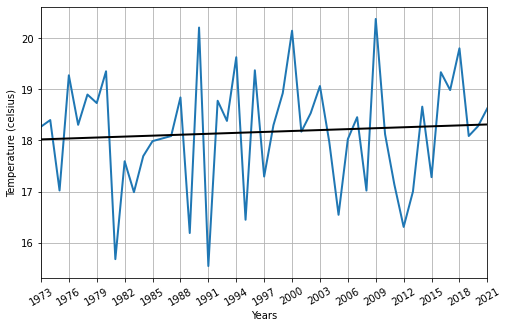

2


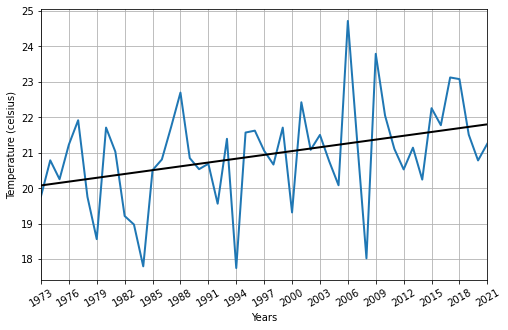

3


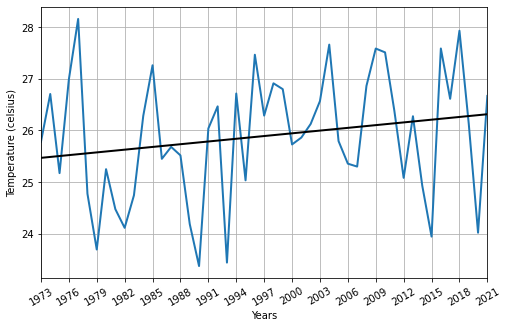

4


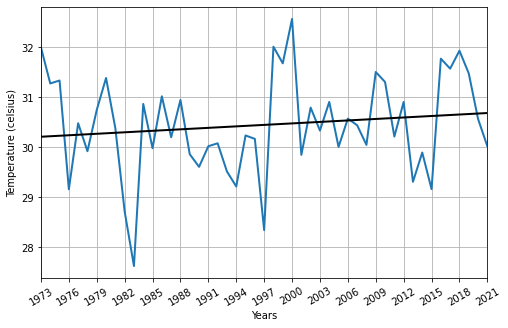

5


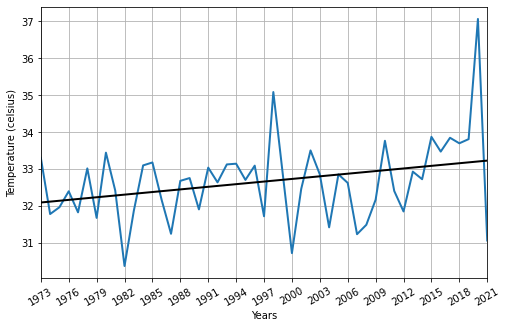

6


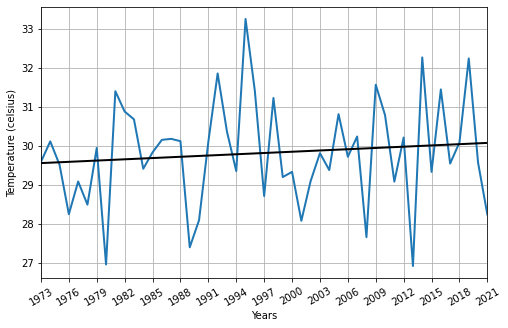

7


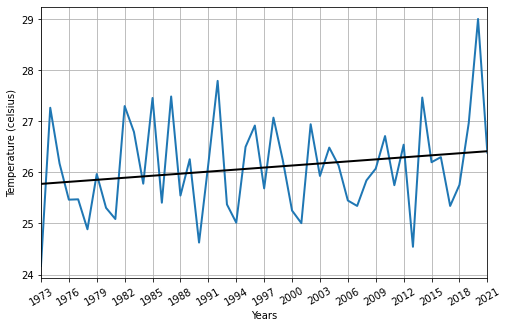

8


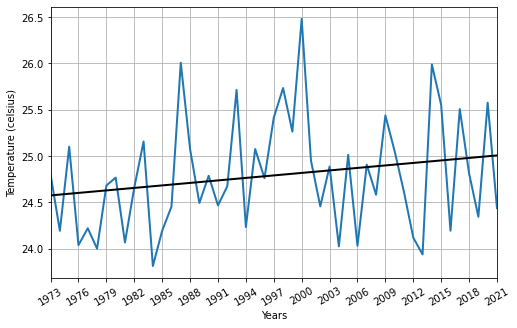

9


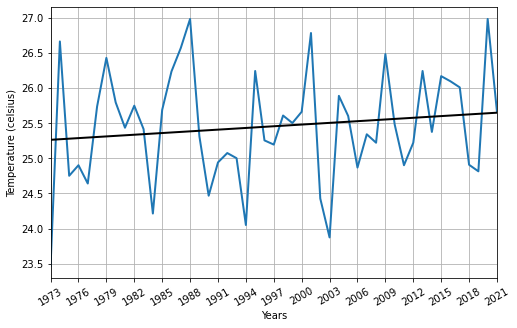

10


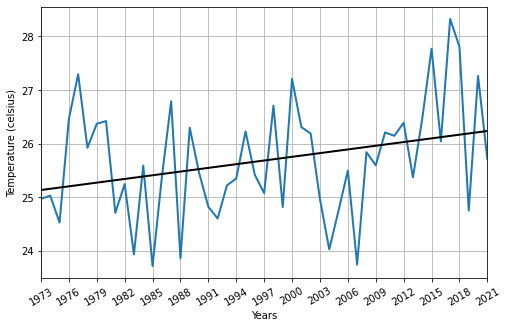

11


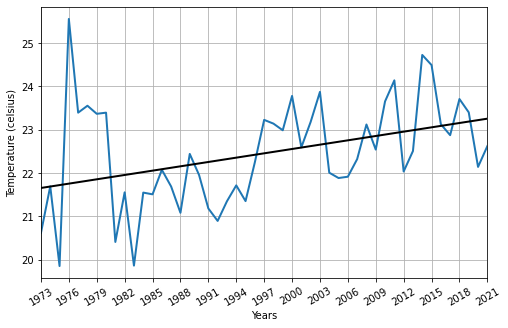

12


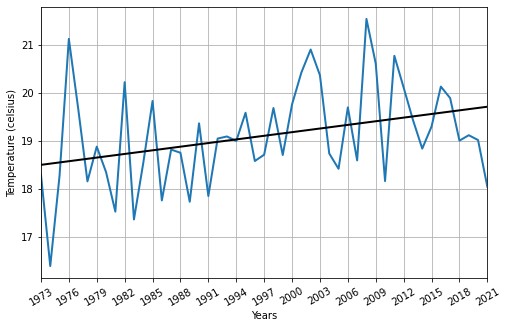

In [8]:
rate = []
differences = []

for i in range(1,13):
    print(i)
    df_one_month = df[df.index.month == i]

    df_every_yr_for_one_month = df_one_month.resample('y').mean()
    df_every_yr_for_one_month["index"] = list(np.arange(0,len(df_every_yr_for_one_month)))

    model = smf.ols('T ~ index', data=df_every_yr_for_one_month)
    model = model.fit()
    pred_ = model.predict()

    fig, ax = plt.subplots(figsize=(8,5))  
    plt.plot(df_every_yr_for_one_month.index.year,df_every_yr_for_one_month['T'],linewidth=2)


    plt.plot(df_every_yr_for_one_month['years'], pred_, 'black', linewidth=2)
    plt.xticks(np.arange(1973,2022,3),rotation=30)
    
    differences.append( ((model.predict({"index": [len(df_every_yr_for_one_month)]}) )- model.predict({"index": [0]}) ).values[0])

    plt.xlabel("Years")
    plt.ylabel("Temperature (celsius)")

    ax.set_xlim(xmin=1973,xmax=2021)

    rate.append(model.params['index'])
    
    plt.grid()
    plt.show()

In [9]:
Months_and_annuals  = ["January","February","March","April","May","June","July","August","September","October","November","December"]                             

In [10]:
Months_and_annuals.append("annual mean temperature")
Months_and_annuals.append("annual mean max temperature")
Months_and_annuals.append("annual mean min temperature")
Months_and_annuals.append("annual mean humidity")
Months_and_annuals.append("annual mean rainfall")
Months_and_annuals.append("annual average visibility")

# [3] Annual Mean Temperature

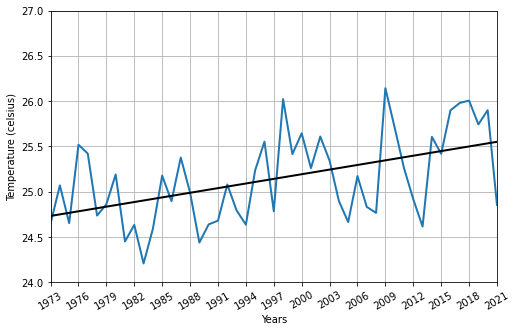

In [11]:
annual_mean = df.resample("y").mean()
annual_mean["index"] = list(np.arange(0,len(annual_mean)))


model = smf.ols('T ~ index', data=annual_mean)

model = model.fit()
pred_ = model.predict()
# print(pred_)

fig, ax = plt.subplots(figsize=(8,5))  
plt.plot(annual_mean["years"] ,annual_mean['T'],linewidth=2)

plt.plot(annual_mean['years'], pred_, 'black', linewidth=2)
plt.xticks(np.arange(1973,2022,3),rotation=30)

plt.xlabel("Years")
plt.ylabel("Temperature (celsius)")
rate.append(model.params['index'])

# print(model.predict({"index": [0]}).values[0])
# print(model.predict({"index": [len(df_every_yr_for_one_month)]}))

differences.append( ((model.predict({"index": [len(df_every_yr_for_one_month)]}) )- model.predict({"index": [0]}) ).values[0])


ax.set_xlim(xmin=1973,xmax=2021)
ax.set_ylim(ymin=24,ymax=27)

rate.append(model.params['index'])

plt.grid()
plt.show()

# [4] Annual mean max. temperature and annual mean min.temperature and linear trend

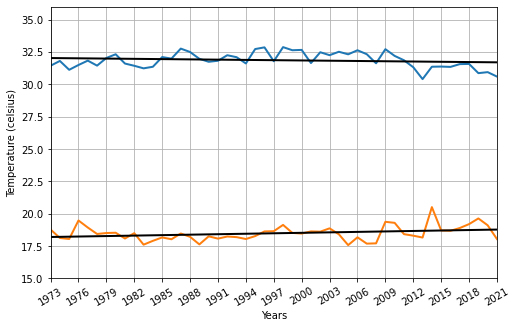

In [12]:

model = smf.ols('TM ~ index',data=annual_mean)
model = model.fit()
pred_ = model.predict()

fig, ax = plt.subplots(figsize=(8,5))  

plt.plot(annual_mean["years"] ,annual_mean['TM'],linewidth=2)
plt.plot(annual_mean['years'], pred_, 'black', linewidth=2)

differences.append( ((model.predict({"index": [len(annual_mean)]}) )- model.predict({"index": [0]}) ).values[0])

model = smf.ols('Tm ~ index',data=annual_mean)
model = model.fit()
pred_ = model.predict()

plt.plot(annual_mean["years"] ,annual_mean['Tm'],linewidth=2)
plt.plot(annual_mean['years'], pred_, 'black', linewidth=2)

plt.xticks(np.arange(1973,2022,3),rotation=30)

plt.xlabel("Years")
plt.ylabel("Temperature (celsius)")

differences.append( ((model.predict({"index": [len(annual_mean)]}) )- model.predict({"index": [0]}) ).values[0])

ax.set_xlim(xmin=1973,xmax=2021)
ax.set_ylim(ymin=15,ymax=36)
# print("slope",model.params['index'])
rate.append(model.params['index'])

plt.grid()

plt.show()

In [13]:
annual_mean

,date,T,TM,Tm,Atmospheric_pressure_at_sea_level,Average_relative_humidity_perc,Total_rainfall,Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,Month,years,index
dates,,,,,,,,,,,,,
1973-12-31,15.328185,24.651254,31.430994,18.775117,1007.369808,55.405968,3.241321,8.751473,13.195901,20.442332,6.579151,1973.0,0
1974-12-31,14.855204,25.070428,31.800650,18.122520,1007.167260,49.469066,2.465906,9.583406,15.393688,23.991470,6.588235,1974.0,1
1975-12-31,14.864865,24.654057,31.116196,18.044998,1007.086531,49.475584,0.111397,9.454932,18.942526,28.013711,6.644144,1975.0,2
1976-12-31,15.008772,25.518893,31.487076,19.474107,1007.542581,51.920009,0.297633,9.592244,20.632240,28.307892,6.482456,1976.0,3
1977-12-31,15.034653,25.421782,31.824092,18.930717,1007.718742,51.071617,4.966711,9.681905,16.653133,26.646929,6.386139,1977.0,4
1978-12-31,14.459893,24.737861,31.438503,18.432086,1008.040143,52.948256,2.781722,7.937005,19.173975,30.192442,6.502674,1978.0,5
1979-12-31,14.654255,24.862589,32.029787,18.504255,1008.473546,52.607624,1.482705,9.583723,16.057979,27.878865,6.473404,1979.0,6
1980-12-31,14.500000,25.191454,32.315957,18.526950,1008.005193,49.149316,2.942359,9.724787,15.222614,26.221925,6.489362,1980.0,7
1981-12-31,14.726316,24.451754,31.599298,18.081754,1008.113895,53.899298,1.998782,10.059158,13.399308,22.099287,6.484211,1981.0,8


# [5] Annual mean humidity time series

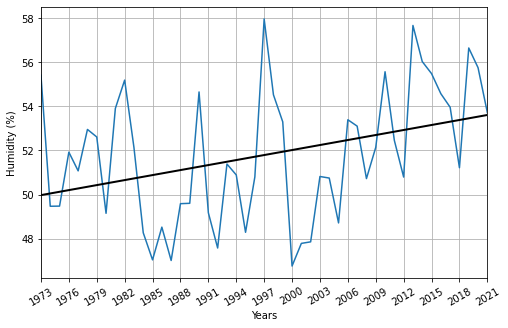

In [14]:
model = smf.ols('Average_relative_humidity_perc ~ index',data=annual_mean)
model = model.fit()
pred_ = model.predict()

fig, ax = plt.subplots(figsize=(8,5))  
plt.plot(annual_mean["years"] ,annual_mean['Average_relative_humidity_perc'])

plt.plot(annual_mean['years'], pred_, 'black', linewidth=2)
plt.xticks(np.arange(1973,2022,3),rotation=30)

plt.xlabel("Years")
plt.ylabel("Humidity (%)")

differences.append( ((model.predict({"index": [len(annual_mean)]}) )- model.predict({"index": [0]}) ).values[0])


ax.set_xlim(xmin=1973,xmax=2021)

rate.append(model.params['index'])

plt.grid()
plt.show()

In [15]:
model.params

Intercept    49.973329
index         0.075626
dtype: float64

# [6] Mean Annual Rainfall

In [16]:
annual_mean

,date,T,TM,Tm,Atmospheric_pressure_at_sea_level,Average_relative_humidity_perc,Total_rainfall,Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,Month,years,index
dates,,,,,,,,,,,,,
1973-12-31,15.328185,24.651254,31.430994,18.775117,1007.369808,55.405968,3.241321,8.751473,13.195901,20.442332,6.579151,1973.0,0
1974-12-31,14.855204,25.070428,31.800650,18.122520,1007.167260,49.469066,2.465906,9.583406,15.393688,23.991470,6.588235,1974.0,1
1975-12-31,14.864865,24.654057,31.116196,18.044998,1007.086531,49.475584,0.111397,9.454932,18.942526,28.013711,6.644144,1975.0,2
1976-12-31,15.008772,25.518893,31.487076,19.474107,1007.542581,51.920009,0.297633,9.592244,20.632240,28.307892,6.482456,1976.0,3
1977-12-31,15.034653,25.421782,31.824092,18.930717,1007.718742,51.071617,4.966711,9.681905,16.653133,26.646929,6.386139,1977.0,4
1978-12-31,14.459893,24.737861,31.438503,18.432086,1008.040143,52.948256,2.781722,7.937005,19.173975,30.192442,6.502674,1978.0,5
1979-12-31,14.654255,24.862589,32.029787,18.504255,1008.473546,52.607624,1.482705,9.583723,16.057979,27.878865,6.473404,1979.0,6
1980-12-31,14.500000,25.191454,32.315957,18.526950,1008.005193,49.149316,2.942359,9.724787,15.222614,26.221925,6.489362,1980.0,7
1981-12-31,14.726316,24.451754,31.599298,18.081754,1008.113895,53.899298,1.998782,10.059158,13.399308,22.099287,6.484211,1981.0,8


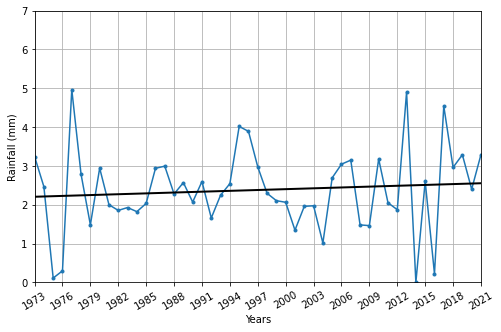

In [17]:
model = smf.ols('Total_rainfall ~ index',data=annual_mean)
model = model.fit()
pred_ = model.predict()


fig, ax = plt.subplots(figsize=(8,5))  
plt.plot(annual_mean["years"] ,annual_mean['Total_rainfall'],marker = ".")

plt.plot(annual_mean['years'], pred_, 'black', linewidth=2)
plt.xticks(np.arange(1973,2022,3),rotation=30)
plt.grid()

plt.xlabel("Years")
plt.ylabel("Rainfall (mm)")

differences.append( ((model.predict({"index": [len(annual_mean)]}) )- model.predict({"index": [0]}) ).values[0])

rate.append(model.params['index'])
ax.set_xlim(xmin=1973,xmax=2021)
ax.set_ylim(ymin=0,ymax=7)

plt.show()

In [18]:
annual_mean

,date,T,TM,Tm,Atmospheric_pressure_at_sea_level,Average_relative_humidity_perc,Total_rainfall,Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,Month,years,index
dates,,,,,,,,,,,,,
1973-12-31,15.328185,24.651254,31.430994,18.775117,1007.369808,55.405968,3.241321,8.751473,13.195901,20.442332,6.579151,1973.0,0
1974-12-31,14.855204,25.070428,31.800650,18.122520,1007.167260,49.469066,2.465906,9.583406,15.393688,23.991470,6.588235,1974.0,1
1975-12-31,14.864865,24.654057,31.116196,18.044998,1007.086531,49.475584,0.111397,9.454932,18.942526,28.013711,6.644144,1975.0,2
1976-12-31,15.008772,25.518893,31.487076,19.474107,1007.542581,51.920009,0.297633,9.592244,20.632240,28.307892,6.482456,1976.0,3
1977-12-31,15.034653,25.421782,31.824092,18.930717,1007.718742,51.071617,4.966711,9.681905,16.653133,26.646929,6.386139,1977.0,4
1978-12-31,14.459893,24.737861,31.438503,18.432086,1008.040143,52.948256,2.781722,7.937005,19.173975,30.192442,6.502674,1978.0,5
1979-12-31,14.654255,24.862589,32.029787,18.504255,1008.473546,52.607624,1.482705,9.583723,16.057979,27.878865,6.473404,1979.0,6
1980-12-31,14.500000,25.191454,32.315957,18.526950,1008.005193,49.149316,2.942359,9.724787,15.222614,26.221925,6.489362,1980.0,7
1981-12-31,14.726316,24.451754,31.599298,18.081754,1008.113895,53.899298,1.998782,10.059158,13.399308,22.099287,6.484211,1981.0,8


# [7] Average Annual Visibility

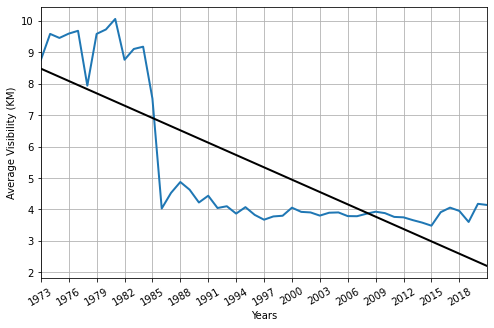

In [19]:
model = smf.ols('Avg_visibility ~ index',data=annual_mean)
model = model.fit()
pred_ = model.predict()


fig, ax = plt.subplots(figsize=(8,5))  
plt.plot(annual_mean["years"] ,annual_mean['Avg_visibility'],linewidth=2)

plt.plot(annual_mean['years'], pred_, 'black', linewidth=2)
plt.xticks(np.arange(1973,2021,3),rotation=30)
plt.grid()


plt.xlabel("Years")
plt.ylabel("Average Visibility (KM)")

differences.append( ((model.predict({"index": [len(annual_mean)]}) )- model.predict({"index": [0]}) ).values[0])

rate.append(model.params['index'])


ax.set_xlim(xmin=1973,xmax=2021)


plt.show()

# [8] Rate of Change of Climate variables

In [20]:
pd.DataFrame(
    {
        "Months and Annuals": Months_and_annuals,
        "Climate variable change for period 1973 to 2022": differences,
        "rate":rate
    }
 )
# ).to_csv("climate_variable_change.csv")

,Months and Annuals,Climate variable change for period 1973 to 2022,rate
0,January,0.298596,0.006094
1,February,1.758982,0.035898
2,March,0.862548,0.017603
3,April,0.484755,0.009893
4,May,1.160206,0.023678
5,June,0.528382,0.010783
6,July,0.653203,0.013331
7,August,0.440273,0.008985
8,September,0.393417,0.008029
9,October,1.124614,0.022951


In [21]:
Intercept_list = []
slope_list = []
coefficient_of_determination_list = []


for i in range(1,13):

    df_one_month = df[df.index.month == i]

    df_every_yr_for_one_month = df_one_month.resample('y').mean()
    df_every_yr_for_one_month["index"] = list(np.arange(0,len(df_every_yr_for_one_month)))

    model = smf.ols('T ~ index', data=df_every_yr_for_one_month)
    model = model.fit()
    
    
    
    Intercept = model.params[0]
    slope = model.params[1]
    coefficient_of_determination = model.rsquared
    
    Intercept_list.append(Intercept)
    slope_list.append(slope)
    coefficient_of_determination_list.append(coefficient_of_determination)
    
    
table1 = pd.DataFrame(
    {
        "Intercept": Intercept_list,
        "Slope":slope_list,
        "Coefficient of Determination": coefficient_of_determination_list
        
    }

)
table1

,Intercept,Slope,Coefficient of Determination
0,18.021344,0.006094,0.005807
1,20.075042,0.035898,0.131019
2,25.469147,0.017603,0.041764
3,30.209787,0.009893,0.019733
4,32.087153,0.023678,0.090271
5,29.551574,0.010783,0.012682
6,25.775574,0.013331,0.040280
7,24.574589,0.008985,0.043070
8,25.261456,0.008029,0.020703
9,25.132100,0.022951,0.091415


In [22]:
table1['Equation'] = "y = " + table1['Slope'].round(decimals=4).astype(str)+ "x + " + table1['Intercept'].round(decimals=4).astype(str) 

Months  = ["January","February","March","April","May","June","July","August","September","October","November","December"]                             
table1["Months"] = Months
table1_month = table1.loc[:,['Months','Equation','Coefficient of Determination']]
table1_month.columns = ['Months','Equation','Coefficient of determination']

In [23]:
model_TM = smf.ols('TM ~ index',data=annual_mean)
model_TM = model_TM.fit()

model_Tm = smf.ols('Tm ~ index',data=annual_mean)
model_Tm = model_Tm.fit()

model_T = smf.ols('T ~ index',data=annual_mean)
model_T = model_T.fit()

model_humidity = smf.ols('Average_relative_humidity_perc ~ index',data=annual_mean)
model_humidity = model_humidity.fit()

model_visibility = smf.ols('Avg_visibility ~ index',data=annual_mean)
model_visibility = model_visibility.fit()

model_rain_fall = smf.ols('Total_rainfall ~ index',data=annual_mean)
model_rain_fall = model_rain_fall.fit()


Intercept_T = model_T.params[0]
slope_T = model_T.params[1]
coefficient_of_determination_T = model_T.rsquared

Intercept_TM = model_TM.params[0]
slope_TM = model_TM.params[1]
coefficient_of_determination_TM = model_TM.rsquared
   

Intercept_Tm = model_Tm.params[0]
slope_Tm = model_Tm.params[1]
coefficient_of_determination_Tm = model_Tm.rsquared


Intercept_humidity = model_humidity.params[0]
slope_humidity = model_humidity.params[1]
coefficient_of_determination_humidity = model_humidity.rsquared   



Intercept_visibility = model_visibility.params[0]
slope_visibility = model_visibility.params[1]
coefficient_of_determination_visibility = model_visibility.rsquared  


Intercept_rain_fall = model_rain_fall.params[0]
slope_rain_fall = model_rain_fall.params[1]
coefficient_of_determination_rain_fall = model_rain_fall.rsquared

In [24]:
table2 = pd.DataFrame(
    {
        "Intercept": [Intercept_T,Intercept_TM,Intercept_Tm,Intercept_humidity,Intercept_rain_fall,Intercept_visibility],
        "Slope":[slope_T,slope_TM,slope_Tm,slope_humidity,slope_rain_fall,slope_visibility],
        "Coefficient of Determination": [coefficient_of_determination_T,coefficient_of_determination_TM,coefficient_of_determination_Tm
                                        ,coefficient_of_determination_humidity,coefficient_of_determination_rain_fall,coefficient_of_determination_visibility
                                        ],
        
        
    }

)
table2['Equation'] = "y = " + table2['Slope'].round(decimals=4).astype(str)+ "x + " + table1['Intercept'].round(decimals=4).astype(str) 
table2['annual'] = ['annual mean temperature', "annual mean max temperature","annual mean min temperature", "annual mean humidity", "annual mean rainfall" , "annual mean visibility" ]           
table2_annual = table2.loc[:,['annual','Equation','Coefficient of Determination']]
table2_annual.columns = ['annual','Equation','Coefficient of determination']
table2

,Intercept,Slope,Coefficient of Determination,Equation,annual
0,24.733607,0.017043,0.246654,y = 0.017x + 18.0213,annual mean temperature
1,32.024591,-0.006889,0.026623,y = -0.0069x + 20.075,annual mean max temperature
2,18.198609,0.011939,0.088616,y = 0.0119x + 25.4691,annual mean min temperature
3,49.973329,0.075626,0.129413,y = 0.0756x + 30.2098,annual mean humidity
4,2.205481,0.007248,0.009089,y = 0.0072x + 32.0872,annual mean rainfall
5,8.478997,-0.130816,0.629741,y = -0.1308x + 29.5516,annual mean visibility


In [26]:
yr = list(range(1973,2022,1))
grp_by_year = df.groupby("years")

mean_val_in_month = pd.DataFrame()
for i in yr:
    mean_val_in_month_for_an_year = grp_by_year.get_group(i).resample('M').mean()
    mean_val_in_month = pd.concat([mean_val_in_month,mean_val_in_month_for_an_year])

In [27]:
mean_val_in_month.head(2)
mean_val_in_month['years'] = mean_val_in_month['years'].astype(int)
mean_val_in_month['Month'] = mean_val_in_month['Month'].astype(int)
mean_val_in_month

,date,T,TM,Tm,Atmospheric_pressure_at_sea_level,Average_relative_humidity_perc,Total_rainfall,Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,Month,years
dates,,,,,,,,,,,,
1973-01-31,16.818182,18.270000,26.400000,10.700000,1014.850000,51.300000,0.000000,8.330000,8.880000,21.140000,1,1973
1973-02-28,14.736842,19.766667,28.750000,12.083333,1014.041667,36.545455,0.000000,7.800000,8.490000,15.200000,2,1973
1973-03-31,16.157895,25.780000,34.533333,16.866667,1010.738462,28.142857,0.000000,9.240000,12.007143,18.971429,3,1973
1973-04-30,15.142857,32.000000,41.000000,23.200000,1004.144444,20.700000,0.000000,9.833333,13.070000,19.480000,4,1973
1973-05-31,15.304348,33.300000,41.777778,26.111111,1002.677778,31.777778,0.000000,10.555556,21.825000,28.587500,5,1973
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,15.062500,24.437500,27.037500,21.637500,1003.393750,86.062500,7.540625,3.687500,14.487500,20.868750,8,2021
2021-09-30,14.000000,25.660000,29.360000,22.446667,1002.866667,84.533333,20.792143,3.873333,11.306667,25.313333,9,2021
2021-10-31,15.062500,25.706250,31.400000,19.331250,1008.787500,57.687500,0.888750,4.025000,7.075000,15.231250,10,2021


In [28]:
monthly_mean_rainfall = mean_val_in_month.reset_index().pivot(index="years", columns="Month", values="Total_rainfall")
monthly_mean_rainfall.head(2)

Month,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
1973,0.0,0.0,0.0,0.0,0.0,0.553636,14.95625,8.888571,11.875000,0.113333,0.0,0.039231
1974,0.0,0.0,0.0,0.0,0.0,3.556364,1.29500,21.667692,1.621538,0.508000,0.0,0.000000


In [30]:
model_TM = smf.ols('TM ~ index',data=annual_mean)
model_TM = model_TM.fit()

model_Tm = smf.ols('Tm ~ index',data=annual_mean)
model_Tm = model_Tm.fit()

model_T = smf.ols('T ~ index',data=annual_mean)
model_T = model_T.fit()

model_humidity = smf.ols('Average_relative_humidity_perc ~ index',data=annual_mean)
model_humidity = model_humidity.fit()

model_visibility = smf.ols('Avg_visibility ~ index',data=annual_mean)
model_visibility = model_visibility.fit()

model_rain_fall = smf.ols('Total_rainfall ~ index',data=annual_mean)
model_rain_fall = model_rain_fall.fit()


Intercept_T = model_T.params[0]
slope_T = model_T.params[1]
coefficient_of_determination_T = model_T.rsquared

Intercept_TM = model_TM.params[0]
slope_TM = model_TM.params[1]
coefficient_of_determination_TM = model_TM.rsquared
   

Intercept_Tm = model_Tm.params[0]
slope_Tm = model_Tm.params[1]
coefficient_of_determination_Tm = model_Tm.rsquared


Intercept_humidity = model_humidity.params[0]
slope_humidity = model_humidity.params[1]
coefficient_of_determination_humidity = model_humidity.rsquared   



Intercept_visibility = model_visibility.params[0]
slope_visibility = model_visibility.params[1]
coefficient_of_determination_visibility = model_visibility.rsquared  


Intercept_rain_fall = model_rain_fall.params[0]
slope_rain_fall = model_rain_fall.params[1]
coefficient_of_determination_rain_fall = model_rain_fall.rsquared

# [9] Prediction of monthly mean temperature

In [31]:
year = [2021,2022,2023,2024,2025,2026]

index_list = [n-1973 for n in year]

output_df = pd.DataFrame(
    
    {
        "index": index_list
    }

)

In [32]:
for_2021_list = []
for_2022_list = []
for_2023_list = []
for_2024_list = []
for_2025_list = []
for_2026_list = []


for i in range(1,13):

    df_one_month = df[df.index.month == i]

    df_every_yr_for_one_month = df_one_month.resample('y').mean()
    df_every_yr_for_one_month["index"] = list(np.arange(0,len(df_every_yr_for_one_month)))

    model = smf.ols('T ~ index', data=df_every_yr_for_one_month)
    model = model.fit()
    
    for_2021 = model.predict(output_df)[0]
    for_2022 = model.predict(output_df)[1]
    for_2023 = model.predict(output_df)[2]
    for_2024 = model.predict(output_df)[3]
    for_2025 = model.predict(output_df)[4]
    for_2026 = model.predict(output_df)[5]
    
    
    for_2021_list.append(for_2021)
    for_2022_list.append(for_2022)
    for_2023_list.append(for_2023)
    for_2024_list.append(for_2024)
    for_2025_list.append(for_2025)
    for_2026_list.append(for_2026)
    
    
prediction_of_monthly_mean_temperature = pd.DataFrame(
    {
    'Months':Months,
    "2021":for_2021_list,
    "2022":for_2022_list,
    "2023":for_2023_list,
    "2024":for_2024_list,
    "2025":for_2025_list,
    "2026":for_2026_list,
    }

    
) 
prediction_of_monthly_mean_temperature

,Months,2021,2022,2023,2024,2025,2026
0,January,18.313846,18.319940,18.326034,18.332128,18.338222,18.344315
1,February,21.798126,21.834024,21.869922,21.905819,21.941717,21.977614
2,March,26.314092,26.331695,26.349298,26.366901,26.384504,26.402107
3,April,30.684650,30.694543,30.704436,30.714329,30.724222,30.734115
4,May,33.223682,33.247359,33.271037,33.294715,33.318392,33.342070
5,June,30.069173,30.079956,30.090740,30.101523,30.112306,30.123089
6,July,26.415447,26.428778,26.442109,26.455439,26.468770,26.482101
7,August,25.005877,25.014862,25.023847,25.032832,25.041818,25.050803
8,September,25.646844,25.654872,25.662901,25.670930,25.678959,25.686988
9,October,26.233762,26.256714,26.279665,26.302616,26.325567,26.348519


In [34]:
model_TM = smf.ols('TM ~ index',data=annual_mean)
model_TM = model_TM.fit()

model_Tm = smf.ols('Tm ~ index',data=annual_mean)
model_Tm = model_Tm.fit()

model_T = smf.ols('T ~ index',data=annual_mean)
model_T = model_T.fit()

model_humidity = smf.ols('Average_relative_humidity_perc ~ index',data=annual_mean)
model_humidity = model_humidity.fit()

model_visibility = smf.ols('Avg_visibility ~ index',data=annual_mean)
model_visibility = model_visibility.fit()


Intercept_T = model_T.params[0]
slope_T = model_T.params[1]
coefficient_of_determination_T = model_T.rsquared

Intercept_TM = model_TM.params[0]
slope_TM = model_TM.params[1]
coefficient_of_determination_TM = model_TM.rsquared
   

Intercept_Tm = model_Tm.params[0]
slope_Tm = model_Tm.params[1]
coefficient_of_determination_Tm = model_Tm.rsquared


Intercept_humidity = model_humidity.params[0]
slope_humidity = model_humidity.params[1]
coefficient_of_determination_humidity = model_humidity.rsquared   


Intercept_visibility = model_visibility.params[0]
slope_visibility = model_visibility.params[1]
coefficient_of_determination_visibility = model_visibility.rsquared  

# [10] Prediction of annual mean climate variables

In [35]:
models_annual = [model_T,model_TM,model_Tm,model_humidity,model_rain_fall,model_visibility]
for_2021_annual_list = []
for_2022_annual_list = []
for_2023_annual_list = []
for_2024_annual_list = []
for_2025_annual_list = []
for_2026_annual_list = []

for model_individual in models_annual:

    for_2021 = model_individual.predict(output_df)[0]
    for_2022 = model_individual.predict(output_df)[1]
    for_2023 = model_individual.predict(output_df)[2]
    for_2024 = model_individual.predict(output_df)[3]
    for_2025 = model_individual.predict(output_df)[4]
    for_2026 = model_individual.predict(output_df)[5]

    for_2021_annual_list.append(for_2021)
    for_2022_annual_list.append(for_2022)
    for_2023_annual_list.append(for_2023)
    for_2024_annual_list.append(for_2024)
    for_2025_annual_list.append(for_2025)
    for_2026_annual_list.append(for_2026)

pd.DataFrame(
    {
    "Annual":['Annual Mean Temperature','Annual Mean Max Temperature','Annual Mean Min Temperature', 'Annual Mean Humidity',
             'Annual Mean Rainfall', 'Annual Average Visibility'],
    "2021":for_2021_annual_list,
    "2022":for_2022_annual_list,
    "2023":for_2023_annual_list,
    "2024":for_2024_annual_list,
    "2025":for_2025_annual_list,
    "2026":for_2026_annual_list
    }

) 

,Annual,2021,2022,2023,2024,2025,2026
0,Annual Mean Temperature,25.551674,25.568717,25.585760,25.602803,25.619846,25.636889
1,Annual Mean Max Temperature,31.693896,31.687006,31.680117,31.673227,31.666338,31.659448
2,Annual Mean Min Temperature,18.771662,18.783600,18.795539,18.807478,18.819416,18.831355
3,Annual Mean Humidity,53.603370,53.678996,53.754622,53.830248,53.905874,53.981499
4,Annual Mean Rainfall,2.553399,2.560648,2.567896,2.575144,2.582393,2.589641
5,Annual Average Visibility,2.199810,2.068994,1.938178,1.807361,1.676545,1.545728


In [36]:
pd.DataFrame(
    {
    "Annual":['Annual Mean Temperature','Annual Mean Max Temperature','Annual Mean Min Temperature', 'Annual Mean Humidity',
             'Annual Mean Rainfall', 'Annual Average Visibility'],
    "2021":for_2021_annual_list,
    "2022":for_2022_annual_list,
    "2023":for_2023_annual_list,
    "2024":for_2024_annual_list,
    "2025":for_2025_annual_list,
    "2026":for_2026_annual_list
    }
)
# ) .to_csv("Annual variables.csv")

,Annual,2021,2022,2023,2024,2025,2026
0,Annual Mean Temperature,25.551674,25.568717,25.585760,25.602803,25.619846,25.636889
1,Annual Mean Max Temperature,31.693896,31.687006,31.680117,31.673227,31.666338,31.659448
2,Annual Mean Min Temperature,18.771662,18.783600,18.795539,18.807478,18.819416,18.831355
3,Annual Mean Humidity,53.603370,53.678996,53.754622,53.830248,53.905874,53.981499
4,Annual Mean Rainfall,2.553399,2.560648,2.567896,2.575144,2.582393,2.589641
5,Annual Average Visibility,2.199810,2.068994,1.938178,1.807361,1.676545,1.545728
